## 0 - Package import ##

In [34]:
import xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, recall_score, f1_score, precision_score

from imblearn.under_sampling import RandomUnderSampler

## 1 - Data import ##

In [2]:
df = pd.read_csv("../datasets/credit_card_default.csv", index_col = 0)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment_next_month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_AMT4  

## 2 - Data preparation ##

### 2.1 - Changing dtypes ###

In [4]:
for col in list(df.select_dtypes(['object']).columns):
    df[col] = df[col].astype('category')

### 2.2 - X and y ###

In [5]:
X = df.drop('default payment_next_month', axis = 1)
y = pd.DataFrame(df['default payment_next_month'])

### 2.3 - Undersampling ###

In [6]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
X_rs_train, X_rs_test, y_rs_train, y_rs_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

## 3 - GridSearch (recall) ##

### 3.1 - Grid setting and model instantiation ###

In [7]:
parameters = {'n_estimators':[200, 300, 400, 500, 600, 700], 
              'max_depth': np.arange(2,6), 
              'learning_rate':[0.02, 0.05, 0.1, 0.15, 0.2, 0.25]}
xgb = xgboost.XGBClassifier(enable_categorical = True, random_state = 11)

### 3.2 - Grid search fitting ###

In [8]:
gs = GridSearchCV(xgb, parameters, verbose = 10, scoring = 'recall')
gs.fit(X_rs_train, y_rs_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START learning_rate=0.02, max_depth=2, n_estimators=200.........
[CV 1/5; 1/144] END learning_rate=0.02, max_depth=2, n_estimators=200;, score=0.593 total time=   0.1s
[CV 2/5; 1/144] START learning_rate=0.02, max_depth=2, n_estimators=200.........
[CV 2/5; 1/144] END learning_rate=0.02, max_depth=2, n_estimators=200;, score=0.590 total time=   0.1s
[CV 3/5; 1/144] START learning_rate=0.02, max_depth=2, n_estimators=200.........
[CV 3/5; 1/144] END learning_rate=0.02, max_depth=2, n_estimators=200;, score=0.581 total time=   0.1s
[CV 4/5; 1/144] START learning_rate=0.02, max_depth=2, n_estimators=200.........
[CV 4/5; 1/144] END learning_rate=0.02, max_depth=2, n_estimators=200;, score=0.584 total time=   0.1s
[CV 5/5; 1/144] START learning_rate=0.02, max_depth=2, n_estimators=200.........
[CV 5/5; 1/144] END learning_rate=0.02, max_depth=2, n_estimators=200;, score=0.581 total time=   0.1s
[CV 1/5; 2/144] S

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bi...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=11, ...),
             param_grid={'learning_rate': [0.02, 0.05, 0.1, 0.15, 0.2, 0.25],
                         'max_depth': array([2, 3, 4, 5]),
                         'n_estimators': [200, 300, 400, 500, 600, 700]},
             scoring='recall', verbose=10)

### 3.3 - Reporting ###

In [9]:
print(gs.best_params_, gs.best_score_)

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 700} 0.6703110273327051


In [10]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_rs_test)
print(classification_report(y_rs_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1324
           1       0.69      0.63      0.66      1331

    accuracy                           0.67      2655
   macro avg       0.68      0.68      0.67      2655
weighted avg       0.68      0.67      0.67      2655



In [11]:
print(recall_score(y_rs_test, y_pred))

0.6296018031555222


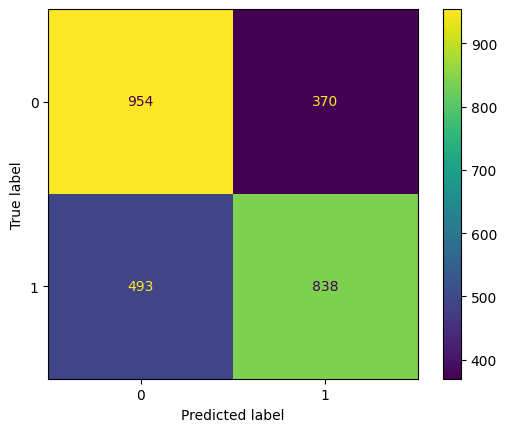

In [12]:
conf_mat = confusion_matrix(y_rs_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()

## 4 - Grid search (F-1 Score) ###

### 4.1 - Grid setting and model instantiation ###

In [ ]:
parameters = {'n_estimators':[200, 300, 400, 500, 600, 700], 
              'max_depth': np.arange(2,6), 
              'learning_rate':[0.02, 0.05, 0.1, 0.15, 0.2, 0.25]}
xgb = xgboost.XGBClassifier(enable_categorical = True, random_state = 11)

### 4.2 - Grid search fitting ###

In [14]:
gs_f = GridSearchCV(xgb, parameters, verbose = 10, scoring = 'f1')
gs_f.fit(X_rs_train, y_rs_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START learning_rate=0.02, max_depth=2, n_estimators=200.........
[CV 1/5; 1/144] END learning_rate=0.02, max_depth=2, n_estimators=200;, score=0.669 total time=   0.1s
[CV 2/5; 1/144] START learning_rate=0.02, max_depth=2, n_estimators=200.........
[CV 2/5; 1/144] END learning_rate=0.02, max_depth=2, n_estimators=200;, score=0.664 total time=   0.1s
[CV 3/5; 1/144] START learning_rate=0.02, max_depth=2, n_estimators=200.........
[CV 3/5; 1/144] END learning_rate=0.02, max_depth=2, n_estimators=200;, score=0.673 total time=   0.1s
[CV 4/5; 1/144] START learning_rate=0.02, max_depth=2, n_estimators=200.........
[CV 4/5; 1/144] END learning_rate=0.02, max_depth=2, n_estimators=200;, score=0.668 total time=   0.1s
[CV 5/5; 1/144] START learning_rate=0.02, max_depth=2, n_estimators=200.........
[CV 5/5; 1/144] END learning_rate=0.02, max_depth=2, n_estimators=200;, score=0.660 total time=   0.1s
[CV 1/5; 2/144] S

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bi...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=11, ...),
             param_grid={'learning_rate': [0.02, 0.05, 0.1, 0.15, 0.2, 0.25],
                         'max_depth': array([2, 3, 4, 5]),
                         'n_estimators': [200, 300, 400, 500, 600, 700]},
             scoring='f1', verbose=10)

### 4.3 - Reporting ###

In [15]:
print(gs_f.best_params_, gs_f.best_score_)
best_model_f = gs_f.best_estimator_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300} 0.6917971551810274


In [109]:
best_model_f = gs_f.best_estimator_
y_pred_f = best_model_f.predict(X_rs_test)
print(classification_report(y_rs_test, y_pred_f))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1324
           1       0.73      0.61      0.66      1331

    accuracy                           0.69      2655
   macro avg       0.69      0.69      0.69      2655
weighted avg       0.69      0.69      0.69      2655



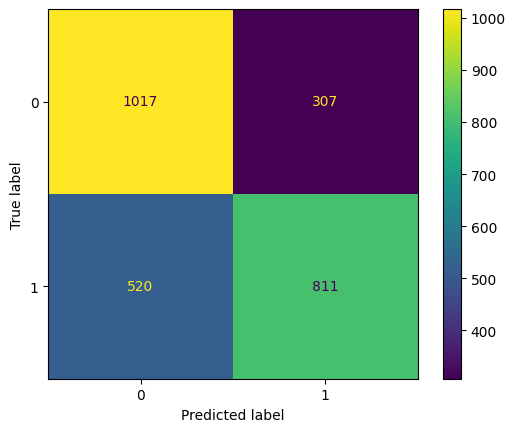

In [111]:
conf_mat_f = confusion_matrix(y_rs_test, y_pred_f)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_f)
disp.plot()

### 4.4 - Threshold tuning ###

In [ ]:
proba_pred = best_model.predict_proba(X_rs_test)

/Users/benjaminamsellem/Desktop/Code/VSCode/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


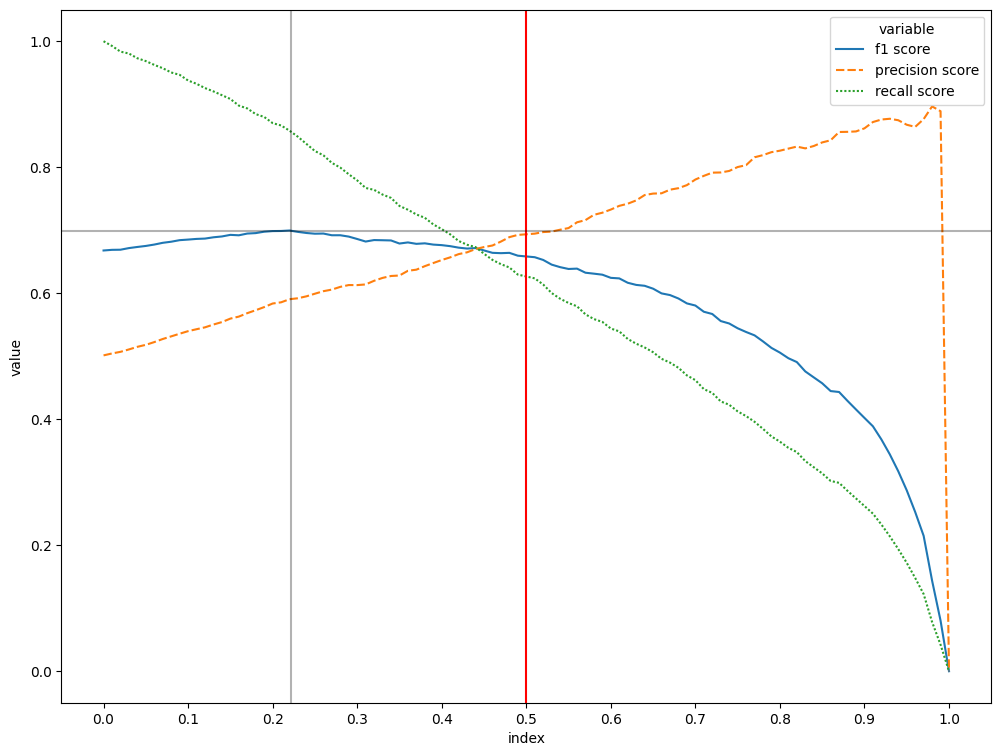

In [107]:
threshold_array = np.linspace(0, 1, 100)
f1_list = []
precision_list = []
recall_list = []

for threshold in threshold_array:
    label_pred_threshold = (proba_pred[:,1] > threshold).astype(int)
    # Calcul du f1 pour un seuil donné
    f1_threshold = f1_score(y_true=y_rs_test, y_pred=label_pred_threshold)
    precision_threshold = precision_score(y_true=y_rs_test, y_pred=label_pred_threshold)
    recall_threshold = recall_score(y_true=y_rs_test, y_pred=label_pred_threshold)

    f1_list.append(f1_threshold)
    precision_list.append(precision_threshold)
    recall_list.append(recall_threshold)

maxo = max(list(f1_list))
indexo = f1_list.index(maxo)

df_results = pd.DataFrame({"index": np.round(threshold_array,2), "f1 score": f1_list, 'precision score': precision_list, 'recall score': recall_list})
df_results = pd.melt(df_results, id_vars = "index")


f, ax = plt.subplots(figsize = (12,9))
ax = sns.lineplot(data = df_results, x = 'index', y= 'value', hue = 'variable', style = 'variable')
ax.set_xticks(np.linspace(0,1,11))
ax.axvline(x= .5, color = 'red')
ax.axvline(x= threshold_array[indexo], color = 'black', alpha = 0.3)
ax.axhline(y = maxo, color = 'black', alpha = 0.3)
plt.show()

## 5 - Appendix ##

In [112]:
df_results = pd.DataFrame({"index": np.round(threshold_array,2), "f1_score": f1_list, 'precision score': precision_list, 'recall_score': recall_list})
df_results.head()

df_results = pd.melt(df_results, id_vars = "index")
df_results.head()

,index,variable,value
0,0.00,f1_score,0.667837
1,0.01,f1_score,0.668861
2,0.02,f1_score,0.669052
3,0.03,f1_score,0.671642
4,0.04,f1_score,0.673427


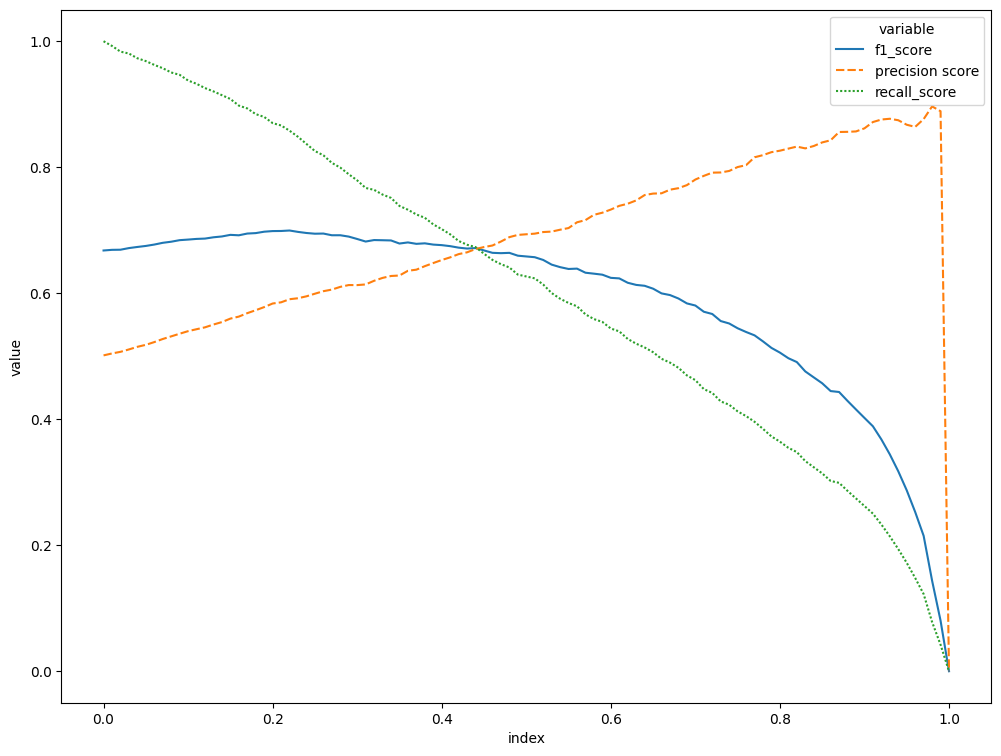

In [65]:
f, ax = plt.subplots(figsize = (12,9))
ax = sns.lineplot(data = df_results, x = 'index', y= 'value', hue = 'variable', style = 'variable')
plt.show()

In [91]:
del(max)

In [93]:
maxo = max(list(f1_list))
indexo = f1_list.index(maxo)